In [42]:
import itertools
import pandas as pd
import datetime as dt
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as web

In [2]:
#let's start by getting dates for our dataframe
end = dt.date.today()
start = dt.date(end.year - 10, end.month, end.day)

In [3]:
#we'll start with using S&P 500 which use the ticker ^GSPC
spx = yf.download("^GSPC", start, end)
spx.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-19,1308.069946,1315.489990,1308.069946,1314.500000,1314.500000,4465890000
2012-01-20,1314.489990,1315.380005,1309.170044,1315.380005,1315.380005,3912620000
2012-01-23,1315.290039,1322.280029,1309.890015,1316.000000,1316.000000,3770910000
2012-01-24,1315.959961,1315.959961,1306.060059,1314.650024,1314.650024,3693560000
2012-01-25,1314.400024,1328.300049,1307.650024,1326.060059,1326.060059,4410910000


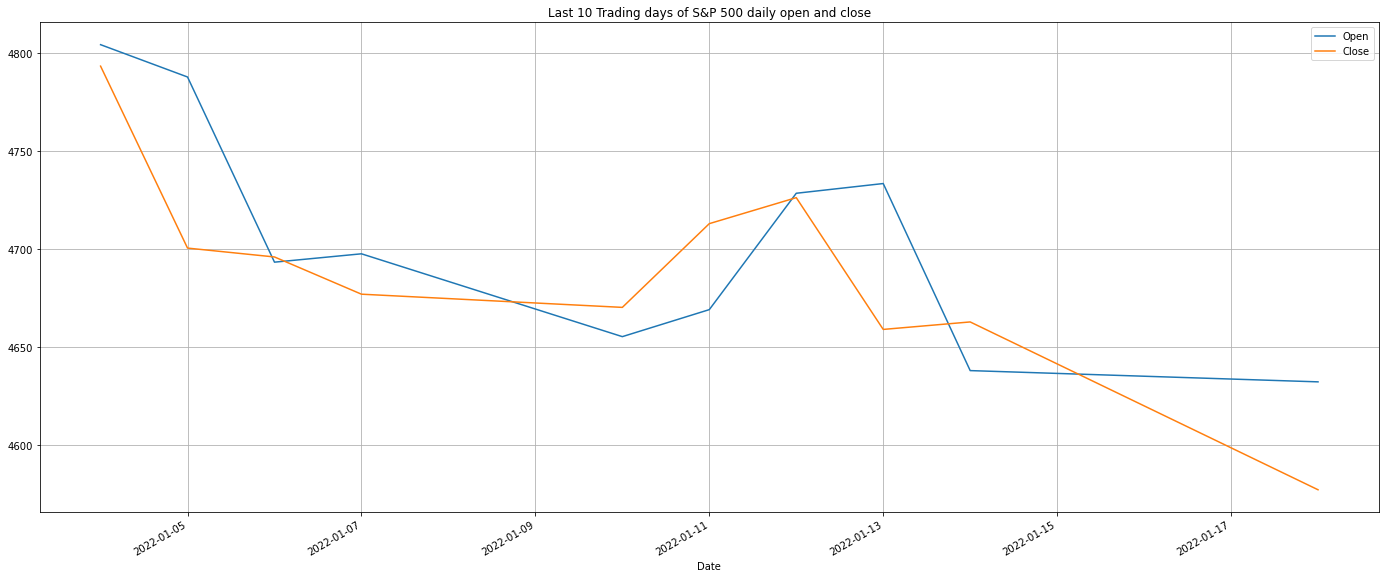

In [4]:
#let's first look at what we are given open and close is the price of the stock when it opens and closes with the market
spx[["Open", "Close"]].tail(10).plot(figsize = (24,10))
plt.title("Last 10 Trading days of S&P 500 daily open and close")
plt.grid()
plt.show()

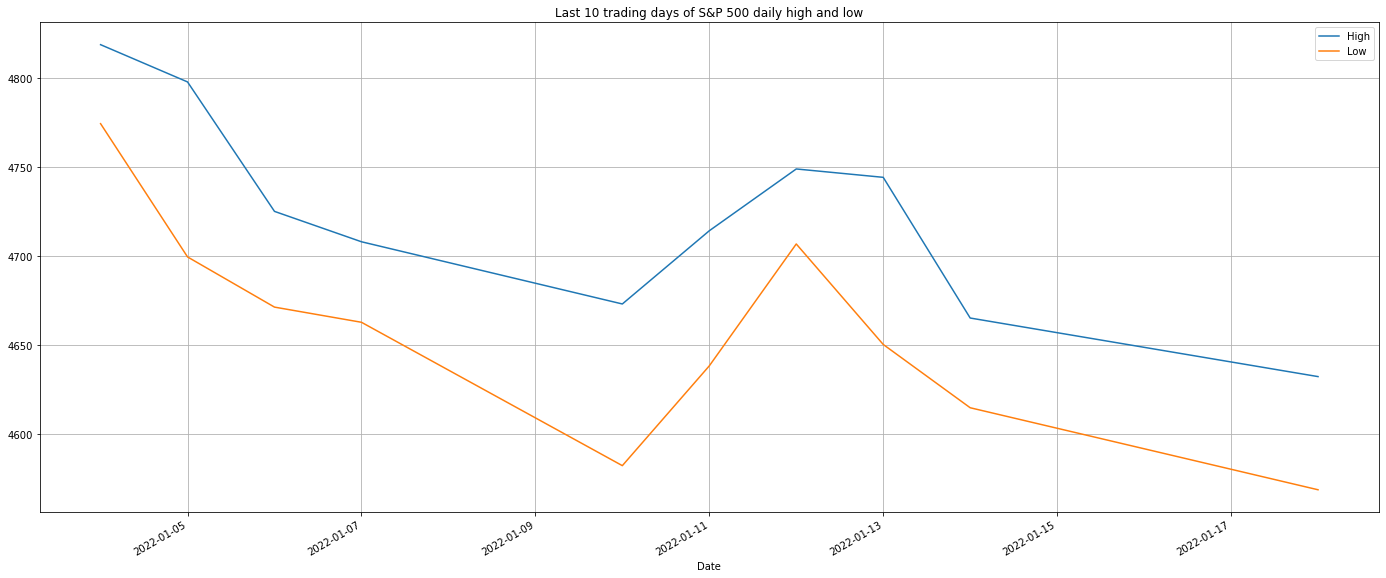

In [5]:
#we can also look at the high and the low which is the 
spx[["High", "Low"]].tail(10).plot(figsize = (24,10))
plt.title("Last 10 trading days of S&P 500 daily high and low")
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed


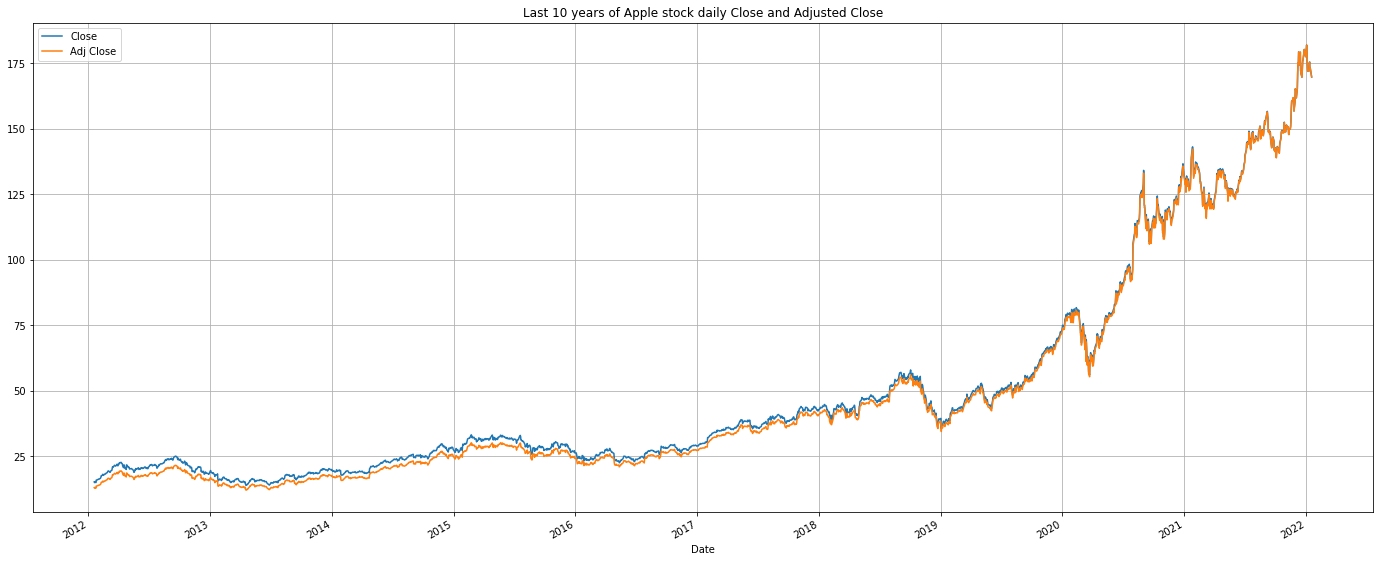

In [6]:
#let's compare adjusted close with close, in this case I'll use a stock 
yf.download("aapl", start, end)[["Close", "Adj Close"]].plot(figsize = (24,10))
plt.title("Last 10 years of Apple stock daily Close and Adjusted Close")
plt.grid()
plt.show()

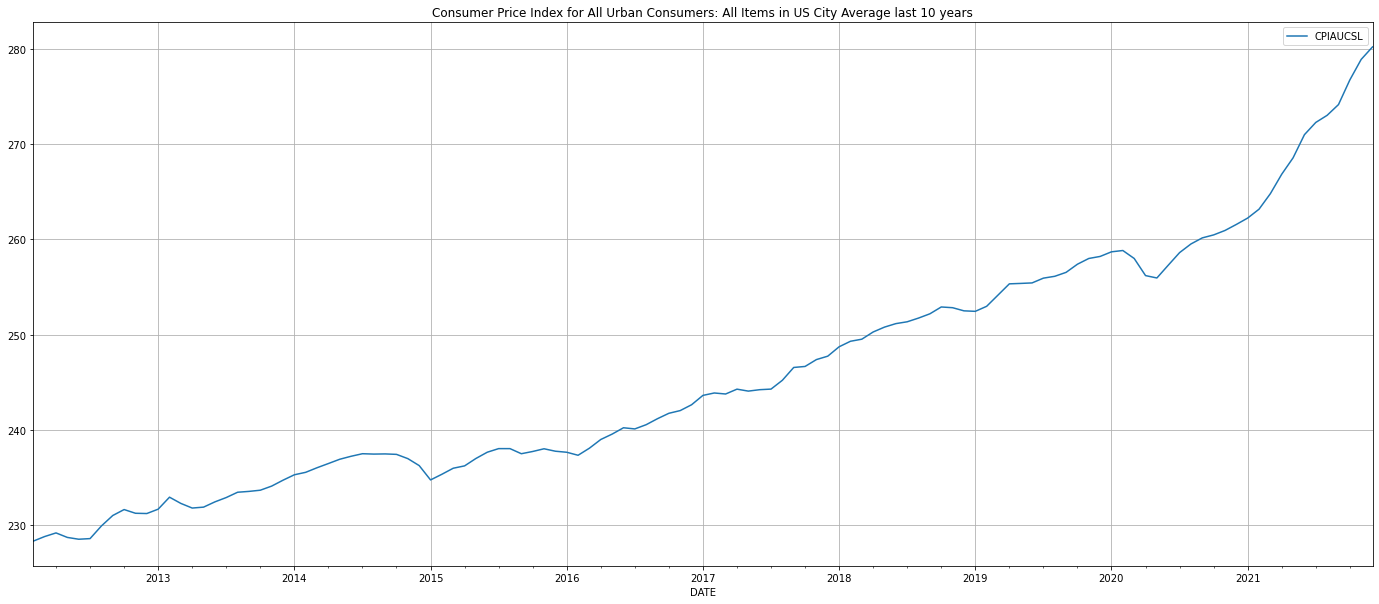

In [7]:
#let's work with pandas_datareader this allows us to pull from other sources such as IMF, OECD, and FRED
#Let's get the CPI rate from FRED

cpi = web.DataReader("CPIAUCSL", "fred", start, end)
cpi.plot(figsize = (24,10))
plt.title("Consumer Price Index for All Urban Consumers: All Items in US City Average last 10 years")
plt.grid()
plt.show()

In [8]:
def colorado_cut():
    
    read_obj = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
    df = read_obj[0]
    
    city = []
    state = []
    
    for i in df["Headquarters Location"]:
        
        i = i.split(",")
        city.append(i[0])
        state.append(i[1])
        
    data_dict = {"Symbol": df["Symbol"], "City": city, "State": state}
    output_df = pd.DataFrame(data = data_dict)
    
    for index, i in enumerate(output_df["State"]):
        
        if i.replace(" ", "") != "Colorado":
            output_df = output_df.drop(index)
            
            
    return output_df

In [9]:
# this will return us with the colorado companies
df = colorado_cut()

In [10]:
#now we can get all of the stocks by passing the values as a list
df["Symbol"]

59      BLL
140     DVA
151    DISH
334     NEM
456     UDR
473     VFC
Name: Symbol, dtype: object

In [11]:
# = yf.download(df["Symbol"].to_list(), start, end)["Adj Close"]
prices.head()

[*********************100%***********************]  6 of 6 completed


,BLL,DISH,DVA,NEM,UDR,VFC
Date,,,,,,
2012-01-19,17.487635,29.179897,39.875000,48.748692,17.570278,24.960276
2012-01-20,17.377619,28.080423,39.884998,48.478783,17.491961,25.042797
2012-01-23,17.322613,27.856634,40.220001,48.470604,17.484848,24.817749
2012-01-24,17.304283,28.070692,40.435001,47.014679,17.833685,24.860878
2012-01-25,17.281355,27.944202,40.930000,49.280346,18.211004,25.172201


In [12]:
prices.to_csv("colorado_companies.csv")

In [13]:
#let's simulate a portfolio in this case we are going to evenly invest the money

#start an allocation array 
allocation_array = [1 / len(prices.columns) for i in range(len(prices.columns))]
allocation_array

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

In [14]:
#then multiply the returns by the allocation array
portfolio_return = prices.pct_change().dropna() * allocation_array
portfolio_return.head()

,BLL,DISH,DVA,NEM,UDR,VFC
Date,,,,,,
2012-01-20,-0.001049,-0.006280,0.000042,-0.000923,-0.000743,0.000551
2012-01-23,-0.000528,-0.001328,0.001400,-0.000028,-0.000068,-0.001498
2012-01-24,-0.000176,0.001281,0.000891,-0.005006,0.003325,0.000290
2012-01-25,-0.000221,-0.000751,0.002040,0.008032,0.003526,0.002087
2012-01-26,0.007339,0.000058,-0.001955,0.000553,0.002150,-0.003328


In [15]:
portfolio_return["total_return"] = portfolio_return.sum(axis = 1)
portfolio_return.head()

,BLL,DISH,DVA,NEM,UDR,VFC,total_return
Date,,,,,,,
2012-01-20,-0.001049,-0.006280,0.000042,-0.000923,-0.000743,0.000551,-0.008401
2012-01-23,-0.000528,-0.001328,0.001400,-0.000028,-0.000068,-0.001498,-0.002050
2012-01-24,-0.000176,0.001281,0.000891,-0.005006,0.003325,0.000290,0.000604
2012-01-25,-0.000221,-0.000751,0.002040,0.008032,0.003526,0.002087,0.014714
2012-01-26,0.007339,0.000058,-0.001955,0.000553,0.002150,-0.003328,0.004818


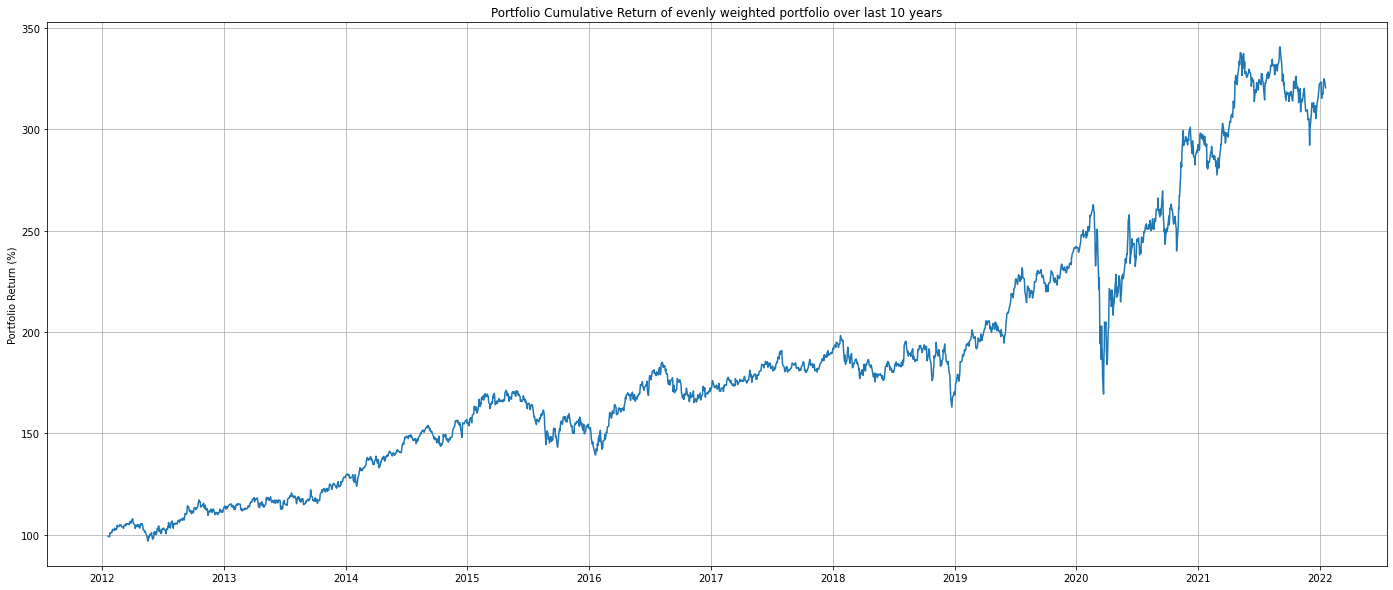

In [16]:
plt.figure(figsize = (24,10))
plt.plot((portfolio_return["total_return"] + 1).cumprod() * 100)
plt.title("Portfolio Cumulative Return of evenly weighted portfolio over last 10 years")
plt.ylabel("Portfolio Return (%)")
plt.grid()
plt.show()

In [17]:
#let's start by keeping track of the portfolio value

#instead of multiplying the returns by the allocation size we'll multiply the stock by the number of shares
#to find the number of shares we need to find how many we are going to buy

starting_capital = 100000
share_array = []

#we want to loop through each column get the amount of starting cash and divide by first share price
for i in prices.columns:
    share_array.append((starting_capital / len(prices.columns)) / prices[i][0])
    
#we are going to get something that is impossible because we end up with fractional shares
share_array

[953.0543719511516,
 571.1694763880347,
 417.97283176593527,
 341.8895181330274,
 948.5715881995645,
 667.7276685704537]

In [18]:
#let's multiply the share price by the number of shares and then get the total value
portfolio_value = prices * share_array
portfolio_value["sum"] = portfolio_value.sum(axis = 1)
portfolio_value.head()

,BLL,DISH,DVA,NEM,UDR,VFC,sum
Date,,,,,,,
2012-01-19,16666.666667,16666.666667,16666.666667,16666.666667,16666.666667,16666.666667,100000.000000
2012-01-20,16561.815562,16038.680704,16670.845693,16574.387641,16592.376776,16721.768514,99159.874892
2012-01-23,16509.391827,15910.859136,16810.867804,16571.591426,16585.630058,16571.497695,98959.837945
2012-01-24,16491.922702,16033.122487,16900.732026,16073.825933,16916.526829,16600.296099,99016.426077
2012-01-25,16470.070845,15960.875466,17107.628132,16848.433719,17274.441231,16808.175191,100469.624583


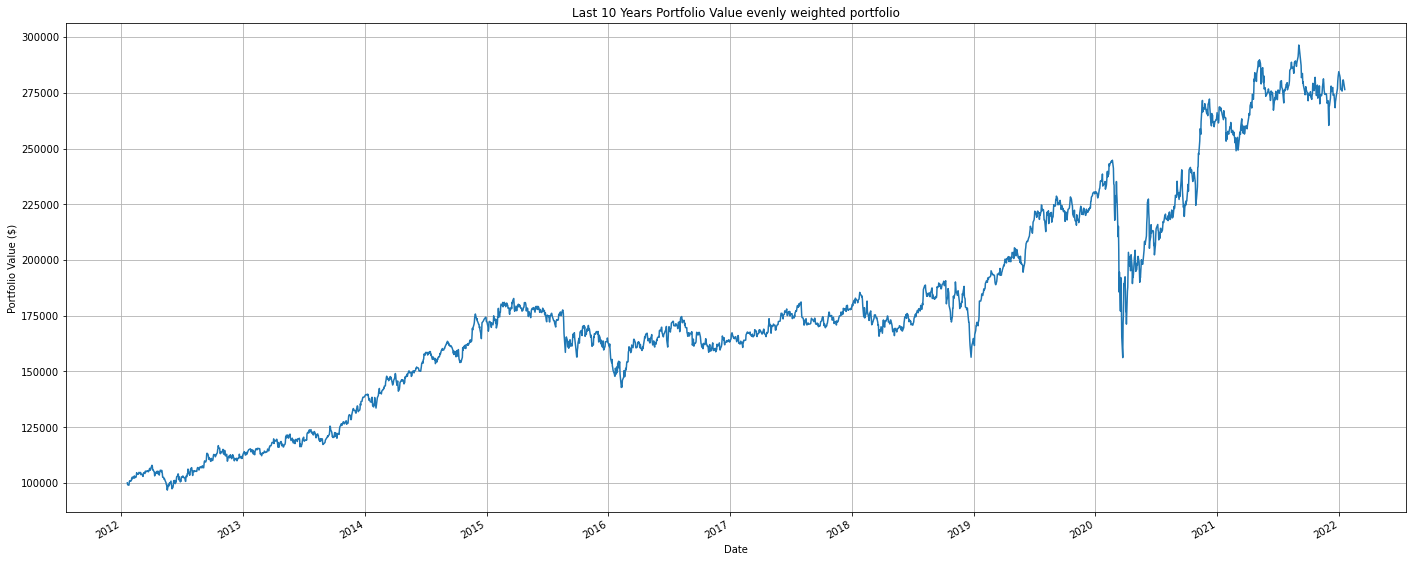

In [19]:
portfolio_value["sum"].plot(figsize = (24,10))
plt.title("Last 10 Years Portfolio Value evenly weighted portfolio")
plt.grid()
plt.ylabel("Portfolio Value ($)")
plt.show()

In [20]:
len(portfolio_return)

2516

In [21]:
#let's compare values
print("final portfolio value:", portfolio_value["sum"][len(portfolio_value) - 1])
print("final return value:", (portfolio_return["total_return"] + 1).cumprod()[len(portfolio_return) - 1] * 100000) 

final portfolio value: 276468.2239748519
final return value: 320473.85253980727


In [22]:
#you can see we have a problem because they are off, actually they are off by too much 

#let's fix that by finding the value of the portfolio using just the close price
prices = yf.download(df["Symbol"].to_list(), start, end)["Close"]
prices.head()

[*********************100%***********************]  6 of 6 completed


,BLL,DISH,DVA,NEM,UDR,VFC
Date,,,,,,
2012-01-19,19.075001,29.990000,39.875000,59.599998,24.680000,31.330038
2012-01-20,18.955000,28.860001,39.884998,59.270000,24.570000,31.433617
2012-01-23,18.895000,28.629999,40.220001,59.259998,24.559999,31.151131
2012-01-24,18.875000,28.850000,40.435001,57.480000,25.049999,31.205273
2012-01-25,18.850000,28.719999,40.930000,60.250000,25.580000,31.596045


In [23]:
portfolio_return = prices.pct_change().dropna() * allocation_array
portfolio_return["total_return"] = portfolio_return.sum(axis = 1)
print((portfolio_return["total_return"] + 1).cumprod()[len(portfolio_return) - 1] * 100000)

276755.0653353788


In [24]:
#so you may ask yourself where do we get the portfolio with $323,000 that comes from reinvesting the dividends
#what we did was get the initial value of the stock on the start day and kept it but as we reinvest the dividends
#the number of shares will change as we reinvest the dividends therefore you have to update the portfolio 
#in real life you wouldn't always reinvest the dividends because it would lead to fractional shares
#this means after each transaction period you need to change the number of shares

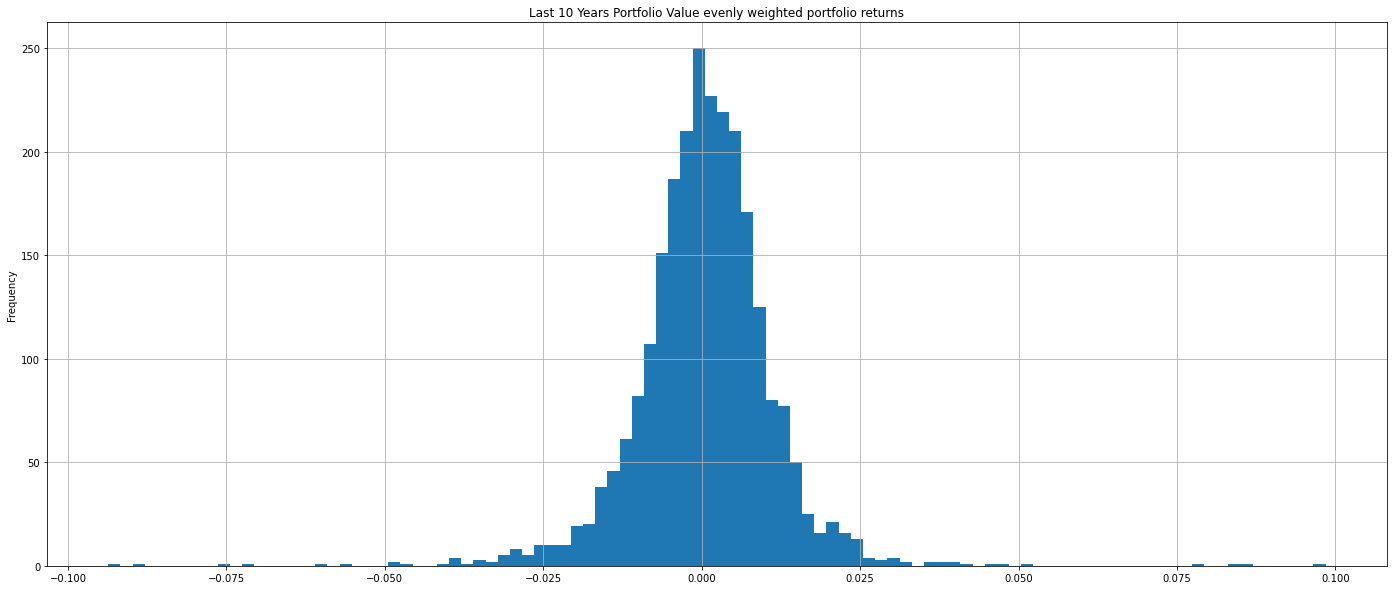

In [25]:
#let's look at the distribution of the portfolio
plt.figure(figsize = (24,10))
portfolio_value["sum"].pct_change().plot(kind = "hist", bins = 100)
plt.title("Last 10 Years Portfolio Value evenly weighted portfolio returns")
plt.grid()
plt.show()

In [26]:
#something that we are interested in is the underlying performance of each stock
#we first need the returns of the stock
prices_returns = prices.pct_change().dropna()
prices_returns.head()

,BLL,DISH,DVA,NEM,UDR,VFC
Date,,,,,,
2012-01-20,-0.006291,-0.037679,0.000251,-0.005537,-0.004457,0.003306
2012-01-23,-0.003165,-0.007970,0.008399,-0.000169,-0.000407,-0.008987
2012-01-24,-0.001059,0.007684,0.005346,-0.030037,0.019951,0.001738
2012-01-25,-0.001324,-0.004506,0.012242,0.048191,0.021158,0.012523
2012-01-26,0.044032,0.000348,-0.011727,0.003320,0.012901,-0.019967


In [27]:
#now we are going to compare all of the stocks agianst themselves to do that we'll use the itertools
combinations = list(itertools.combinations(prices_returns.columns, 2))
combinations

[('BLL', 'DISH'),
 ('BLL', 'DVA'),
 ('BLL', 'NEM'),
 ('BLL', 'UDR'),
 ('BLL', 'VFC'),
 ('DISH', 'DVA'),
 ('DISH', 'NEM'),
 ('DISH', 'UDR'),
 ('DISH', 'VFC'),
 ('DVA', 'NEM'),
 ('DVA', 'UDR'),
 ('DVA', 'VFC'),
 ('NEM', 'UDR'),
 ('NEM', 'VFC'),
 ('UDR', 'VFC')]

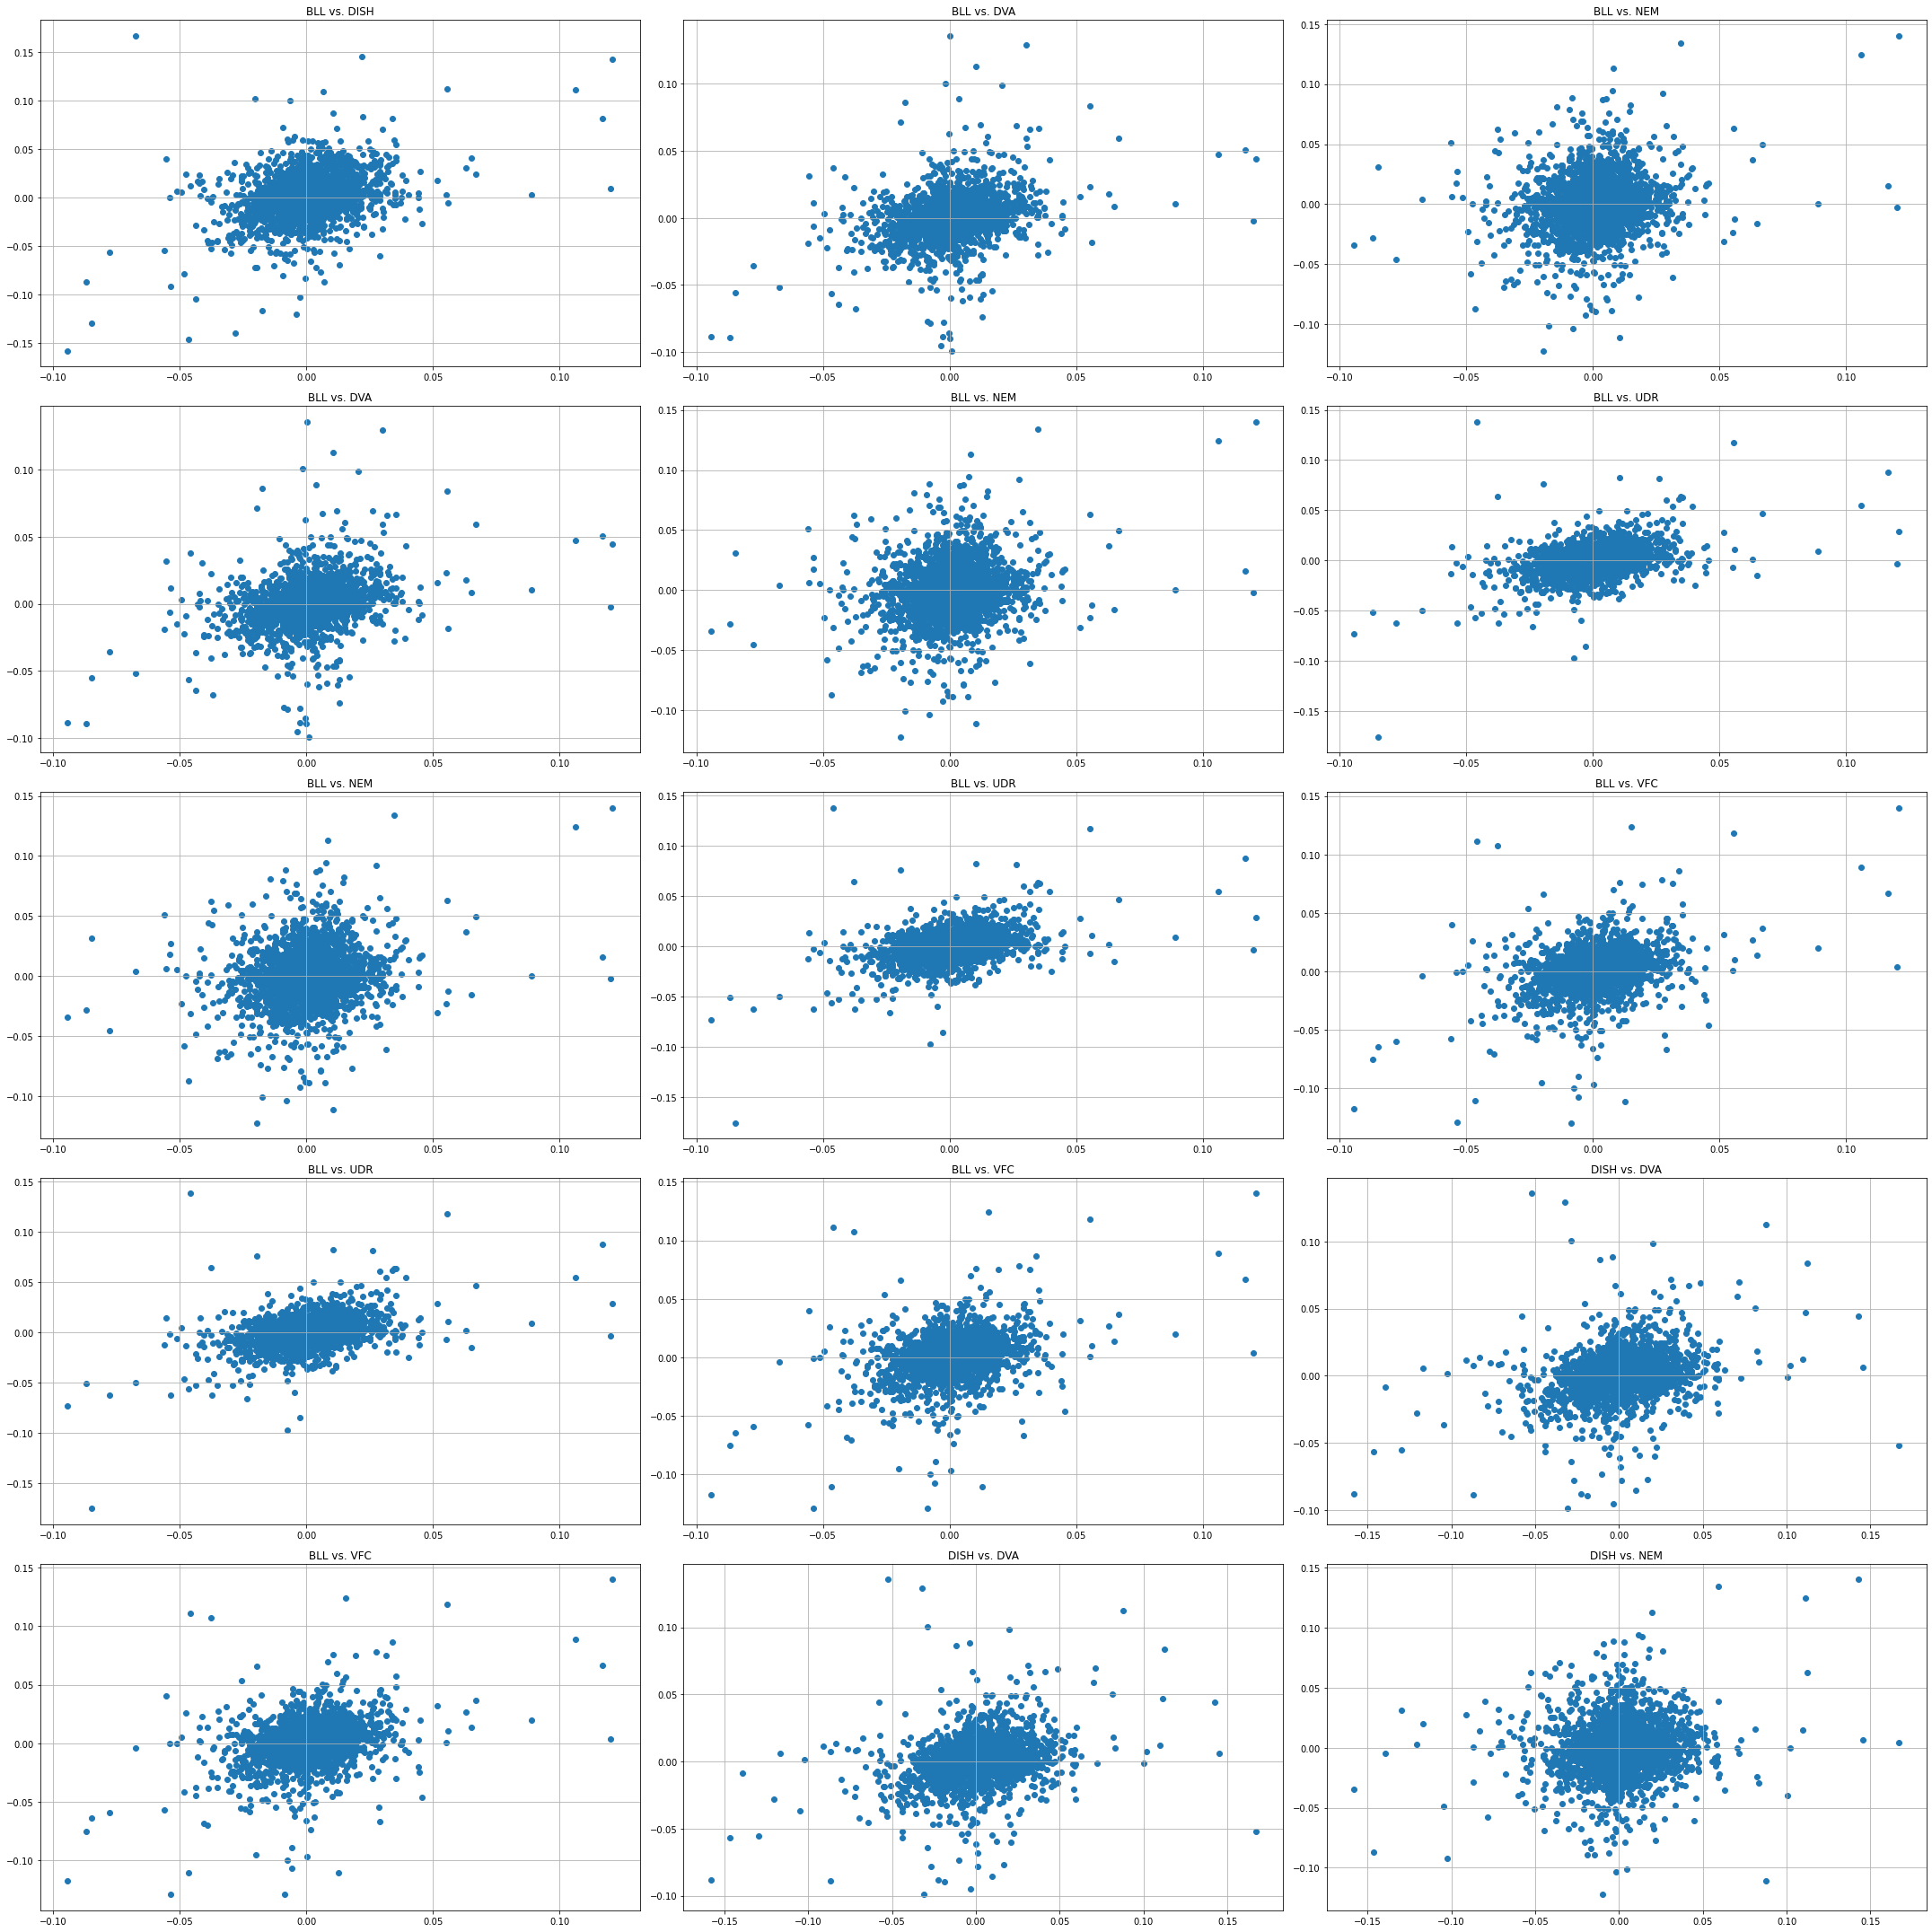

In [28]:
row_count = 5
col_count = 3
fig, axes = plt.subplots(row_count, col_count, figsize = (30,30))

for i in range(5):
    for j in range(3):
        axes[i,j].scatter(prices_returns[combinations[i+j][0]], prices_returns[combinations[i+j][1]])
        axes[i,j].set_title("{} vs. {}".format(combinations[i+j][0], combinations[i+j][1]))
        axes[i,j].grid()
        
plt.tight_layout()
plt.show()

In [29]:
#calculating mean, standard deviation, alpha, beta, sharpe

In [37]:
#let's find the average portfolio return
round(portfolio_value[portfolio_value.columns[len(portfolio_value.columns) - 1]].pct_change().mean() * 100,2)

0.05

In [39]:
#let's find the standard deviation of the portfolio's return
round(portfolio_value[portfolio_value.columns[len(portfolio_value.columns) - 1]].pct_change().std(), 2)

0.01

In [41]:
#let's find the covariance matrix of the underlying stocks
prices.cov()

,BLL,DISH,DVA,NEM,UDR,VFC
BLL,512.731862,-113.464998,316.457106,195.207639,158.387434,254.961370
DISH,-113.464998,188.468334,11.367610,-125.701658,-24.728556,-19.805146
DVA,316.457106,11.367610,364.919337,113.436269,90.564447,158.072963
NEM,195.207639,-125.701658,113.436269,190.122036,40.747004,16.624640
UDR,158.387434,-24.728556,90.564447,40.747004,72.599049,102.818744
VFC,254.961370,-19.805146,158.072963,16.624640,102.818744,257.792812


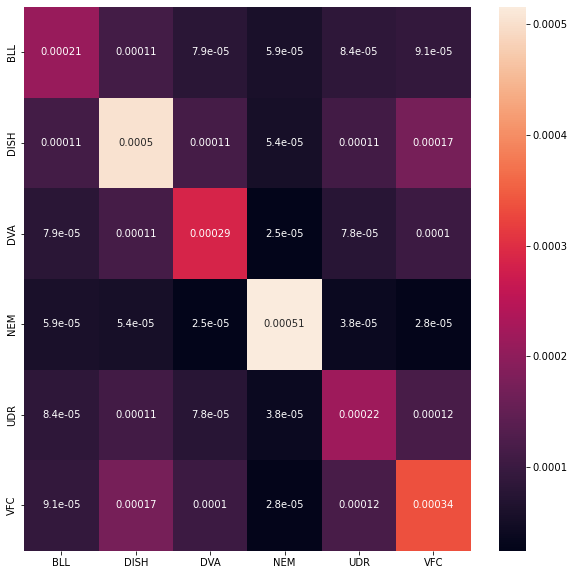

In [48]:
#making it look nicer
plt.figure(figsize = (10,10))
sns.heatmap(prices.pct_change().dropna().cov(), annot = True)
plt.show()